## CS 237 Homework 07 (Programming Problem) 

**Due Thursday March 124th at Midnight (1 minute after 11:59pm) in Gradescope (with grace period of 6 hours).
Homeworks may be submitted up to 24 hours late with a 10% penalty (same grace period).**

Enter your solutions in this notebook and submit as an IPYNB file on Gradescope. Don't forget to include information about your collaborators (or say **Collaborators: none**).


In [4]:
# Imports potentially used for this problem

import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi,log,floor       # import whatever you want from math
from numpy.random import seed, random, randint
from collections import Counter

%matplotlib inline


## General Instructions -- Let's Gamble!

This week's programming problem will focus on choosing an appropriate
strategy for a game of chance, by considering average payoff for each
possible strategy. This way of thinking about games of chance is
a good introduction to the notion of *expected value*
which we will explore in the next few lectures. 


## Problem: What is the best strategy for the game of Twenty-One?
Now suppose we want to actually figure out the right strategy in a game of chance. 

We will play a version of blackjack called Twenty-One and figure out the best strategy for the game.

### Twenty One
This game is similar to the famous card game blackjack. We will play a one-player version of the game. The game is played for some number `num_trials` of rounds (we will use `num_trials` = $10^5$), at the end of which the player wins points. The player accumulates points during the whole game, and the objective is, of course, to end up with the maximum number of points. 

The objective in each round of the game is to score as close to 21 as possible by rolling a die as many times as you wish and adding all the numbers that appear. When a player's total exceeds 21, he is 'busted' and gets 0 points. If the player chooses to stop rolling before he exceeds 21, then he wins whatever his total is at that point. So for example, if a player rolls 5, 2, 4, and then 6, his total at that point is 17, and he has to decide whether it is worth trying again: he will be busted if he gets 5 or more (since 17+5=22), but will get a better total if he gets 4 or less.  

There are many variations on this game, some involving multiple players, or a "banker" or different numbers of dice, or alcohol..... <a href="https://www.youtube.com/watch?v=eyoh-Ku9TCI">here</a> is a short YT video explaining the version played in casinos (we have simplified it in many ways for this problem). 

A computer can play this game with a suitable strategy. For this problem, we will consider a strategy to be simply an integer K which is the value at which you stop rolling (thinking that you are close enough to 21). The number K is fixed for the entire game. For example, if you set K = 19, then in every round, you will keep rolling if your sum to that point is less than 19; if you get a num &ge; 19 you stop. Clearly, any good strategy will be a number at least 15, since 15+6=21 and if you roll again at 15, you will never bust. But we will try all possible strategies. 

### To Do
You should write a function <code>playRound(K)</code> which rolls a single die until you reach or exceed K or get busted, and either return your score (if you reached or exceeded K), or 0 (if you were busted). Then write code which calls <code>playRound(K)</code> for N = $10^5$ times for each K and returns an array of 21 numbers giving the average payoff for each K = 1, ..., 21.

(This is a suggestion - if you have a better idea for how to organized your code, that is fine.)

Your task is to answer the following questions: 

(A) For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?

(B) What is the best strategy for the game, meaning what value of K wins the most points on average?

Print out the average payoffs for each strategy and an appropriate bar chart for the first question, and simply print out the answer to the second question using a `print(...)` function. You must calculate the answer in Python, not by observation of the graph. 

K =  1  3.00985
K =  2  3.60296
K =  3  4.31953
K =  4  5.19035
K =  5  6.21931
K =  6  7.46927
K =  7  8.35226
K =  8  9.30502
K =  9  10.3143
K =  10  11.32993
K =  11  12.35667
K =  12  13.33826
K =  13  14.32978
K =  14  15.32704
K =  15  16.33213
K =  16  17.33857
K =  17  18.3262
K =  18  17.87548
K =  19  15.85685
K =  20  12.27107
K =  21  7.01547
Pay Off per rounds =  [3.00985, 3.60296, 4.31953, 5.19035, 6.21931, 7.46927, 8.35226, 9.30502, 10.3143, 11.32993, 12.35667, 13.33826, 14.32978, 15.32704, 16.33213, 17.33857, 18.3262, 17.87548, 15.85685, 12.27107, 7.01547]


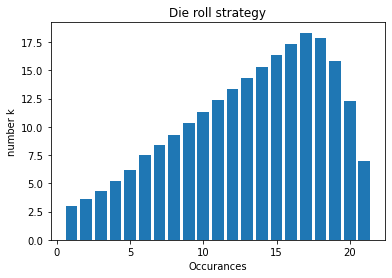

In [8]:
#Plays a single round of Twenty One with strategy K (flips the die until K is
#reached or the player busts) and returns the score.

def playRound(K):
    
    count = 0
    while count < K:
        roll = randint(1,6)
        count += roll
    if count > 21:
        count = 0
    return count               # your code here
def main():
    averages = []
    num = []
    
    for i in range(1,22):
        trial_total = 0
        num.append(i)
        for j in range(num_trials):
            count = playRound(i)
            trial_total += count
        avg = trial_total/num_trials
        averages.append(avg)
        print("K = ",i,"",avg)
    print("Pay Off per rounds = ",averages)
    plt.bar(num, averages)
    plt.title('Die roll strategy')
    plt.xlabel("Occurances")
    plt.ylabel("number k")
    plt.show()
    
main()

#Calculate the average payoff for each possible strategy K = 1, 2, ..., 21
#by playing the game num_trials times for each K and keeping track of the payoff.
num_trials = 10**5
seed(0)

# Your code here     